In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # Visualization
import seaborn as sns             # Visualization
import re
%matplotlib inline
sns.set(color_codes=True)

In [2]:
eviction_df = pd.read_csv("/content/Eviction_Data.csv")

### Data Review


The eviction data set was extracted from the LA Controller's Website. The dataset consists of eviction records from Feb 2023 to Dec 2023

In [3]:
eviction_df.shape

(77091, 12)

In [4]:
eviction_df.dtypes

,0
Notice Date,object
Date Received,object
Eviction Category,object
Cause,object
Address,object
City,object
Zip,int64
Bedroom,float64
Notice Type,object
Apn,int64


In [5]:
eviction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77091 entries, 0 to 77090
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Notice Date        77085 non-null  object 
 1   Date Received      77091 non-null  object 
 2   Eviction Category  77091 non-null  object 
 3   Cause              77089 non-null  object 
 4   Address            77091 non-null  object 
 5   City               77091 non-null  object 
 6   Zip                77091 non-null  int64  
 7   Bedroom            65224 non-null  float64
 8   Notice Type        77091 non-null  object 
 9   Apn                77091 non-null  int64  
 10  Council District   77091 non-null  int64  
 11  Rent Owed          77091 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 7.1+ MB


The data set comprises of 12 attributes and 77,091 values. We need to change the data types of a few columns to make them more legible and easier for further calculations.

In [6]:
# To display the top 5 rows
eviction_df.head(5)

,Notice Date,Date Received,Eviction Category,Cause,Address,City,Zip,Bedroom,Notice Type,Apn,Council District,Rent Owed
0,2/3/2023,2/3/2023,At-Fault,Non-payment of rent,7367 Hollywood Blvd,Los Angeles,90046,NaN,3 Day,5550001030,4,"$1,850.00"
1,2/3/2023,2/3/2023,At-Fault,Non-payment of rent,7367 Hollywood Blvd,Los Angeles,90046,NaN,3 Day,5550001030,4,"$1,866.78"
2,2/3/2023,2/3/2023,At-Fault,Non-payment of rent,7367 Hollywood Blvd,Los Angeles,90046,NaN,3 Day,5550001030,4,"$1,800.00"
3,2/3/2023,2/3/2023,At-Fault,Non-payment of rent,7367 Hollywood Blvd,Los Angeles,90046,NaN,3 Day,5550001030,4,"$1,500.00"
4,2/3/2023,2/3/2023,At-Fault,Non-payment of rent,7367 Hollywood Blvd,Los Angeles,90046,NaN,3 Day,5550001030,4,"$1,742.97"


In [7]:
# Finding out the null values in the data set
print(eviction_df.isnull().sum())

Notice Date              6
Date Received            0
Eviction Category        0
Cause                    2
Address                  0
City                     0
Zip                      0
Bedroom              11867
Notice Type              0
Apn                      0
Council District         0
Rent Owed                0
dtype: int64


We observe that the majority of Nan values (around 11867) are present in the Bedroom column.

In [8]:
# Unique bedroom values
num_unique_values = len(eviction_df['Bedroom'].unique())
num_unique_values           # 18 values
eviction_df['Bedroom'].unique()

array([      nan, 3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 4.000e+00,
       5.000e+00, 8.000e+00, 7.000e+00, 6.000e+00, 1.440e+02, 1.040e+02,
       9.000e+00, 1.000e+01, 1.200e+02, 3.014e+03, 1.100e+01, 1.130e+02])

In [9]:
df = eviction_df
df[df['Bedroom'] > 4].shape[0]       # 488 values where bedroom > 4 ==> outliers

488

In [10]:
df[df['Bedroom'] > 4]

,Notice Date,Date Received,Eviction Category,Cause,Address,City,Zip,Bedroom,Notice Type,Apn,Council District,Rent Owed
3616,2/13/2023,2/23/2023,At-Fault,Violation of the rental agreement or lease,17805 Erwin St,Los Angeles,91316,5.0,3 Day,2123021065,4,$0.00
3821,2/13/2023,2/23/2023,At-Fault,Non-payment of rent,17805 Erwin St,Los Angeles,91316,5.0,3 Day,2123021065,4,"$21,300.00"
4012,2/26/2023,2/26/2023,At-Fault,Non-payment of rent,4202 Woodman Ave,Sherman Oaks,91423,5.0,3 Day,2373013022,4,"$8,000.00"
4114,2/28/2023,2/28/2023,At-Fault,"Non-payment of rent, Damage to the rental unit",9027 Wonderland Ave,Los Angeles,90046,5.0,3 Day,5564030003,4,"$45,416.74"
5277,3/1/2023,3/6/2023,At-Fault,Non-payment of rent,907 Las Pulgas Rd,Los Angeles,90272,5.0,3 Day,4420011016,11,"$107,800.00"
...,...,...,...,...,...,...,...,...,...,...,...,...
76813,12/26/2023,12/27/2023,At-Fault,Non-payment of rent,11840 N CHIVERS AVE,PACOIMA,91331,5.0,3 Day,2527002006,7,"$3,986.00"
76856,12/22/2023,12/28/2023,At-Fault,Non-payment of rent,156 W 71ST ST,Los Angeles,90003,5.0,3 Day,6012013016,9,"$3,059.00"
76857,12/22/2023,12/28/2023,At-Fault,Non-payment of rent,642 E 55TH ST,Los Angeles,90011,5.0,3 Day,5103012007,9,"$8,850.00"
76864,12/28/2023,12/28/2023,At-Fault,Non-payment of rent,11716 N MANCHESTER WAY,Los Angeles,91326,5.0,3 Day,2701090005,12,"$11,000.00"


In [11]:
df.shape

(77091, 12)

### Data Cleaning - Removing null values and outliers

In [12]:
# Removing null values
temp_df = df.dropna(subset=['Bedroom'])

In [13]:
temp_df.shape

(65224, 12)

In [14]:
# Removing the outliers - 488
threshold = 4
temp_df2 = temp_df
temp_df2 = temp_df2[temp_df2['Bedroom'] <= threshold]
temp_df2.shape

(64736, 12)

In [15]:
# convert float to integer
temp_df2['Bedroom'] = temp_df2['Bedroom'].astype(int)

<ipython-input-15-eadfefbd2790>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df2['Bedroom'] = temp_df2['Bedroom'].astype(int)


### Exploratory Data Analysis (EDA)

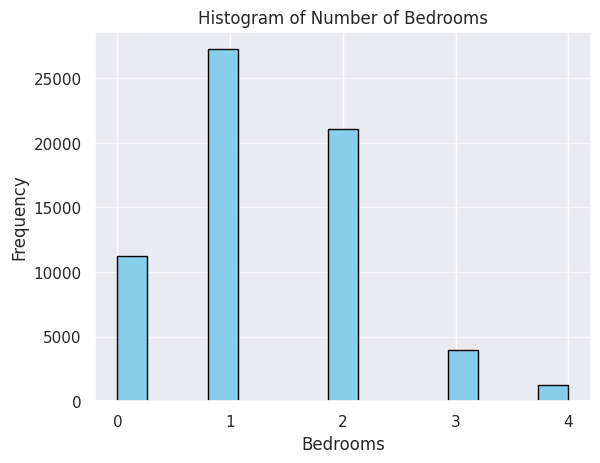

In [16]:
#Plot histogram to check for distribution
plt.hist(temp_df2['Bedroom'], bins = 15, color='skyblue', edgecolor='black')
                            #alpha=0.7, rwidth=0.85)
plt.xticks(np.arange(0,5, step = 1))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Bedrooms')

plt.show()

In [17]:
count_per_category = temp_df2['Eviction Category'].value_counts()
total_values = temp_df2['Eviction Category'].count()
percentage_per_category = (count_per_category / total_values) * 100

In [18]:
print("Count and percentage per category:")
print(pd.concat([count_per_category, percentage_per_category], axis=1, keys=['count', 'percentage']))

Count and percentage per category:
                   count  percentage
Eviction Category                   
At-Fault           64411   99.497961
No-Fault             325    0.502039


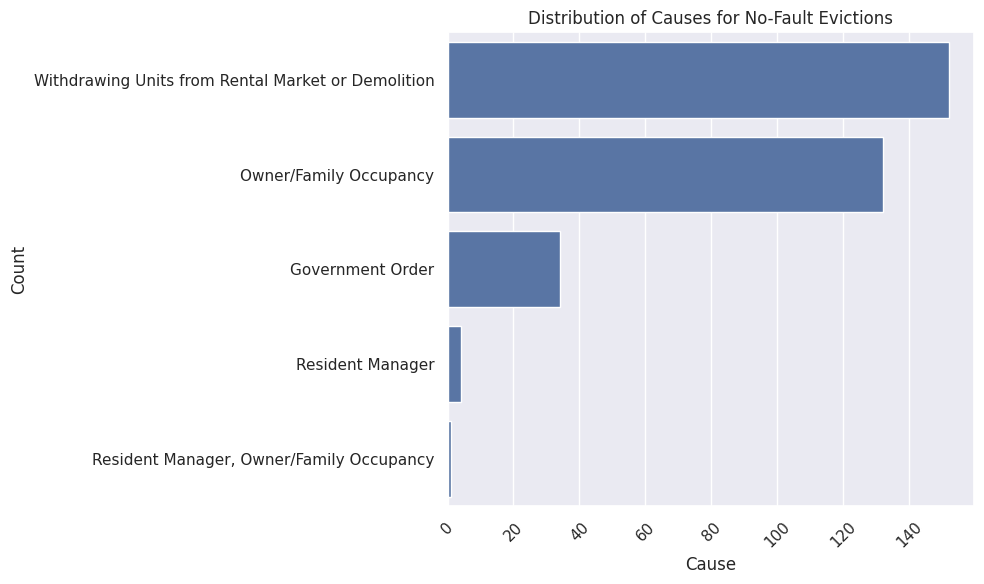

In [19]:
# Filter to include only 'No-Fault' evictions
no_fault_df = temp_df2[temp_df2['Eviction Category'] == 'No-Fault']

# Plot the distribution of 'Cause' in 'No-Fault' evictions
plt.figure(figsize=(10, 6))

sns.countplot(y='Cause', data=no_fault_df, order=no_fault_df['Cause'].value_counts().index)
plt.title('Distribution of Causes for No-Fault Evictions')
plt.xlabel('Cause')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
# Get the summary count for each 'Cause'
cause_summary = no_fault_df['Cause'].value_counts()

# Display the summary
print(cause_summary)

Cause
Withdrawing Units from Rental Market or Demolition    152
Owner/Family Occupancy                                132
Government Order                                       34
Resident Manager                                        4
Resident Manager, Owner/Family Occupancy                1
Name: count, dtype: int64


We observe that around 0.5% of the dataset contains No-Fault tenants. The above plot and statistics show the reason behind the No-Fault tenants getting the eviction notices. The stats show that a majority of the reason included withdrawal of the rental unit from the market or family occupancy.

<ipython-input-21-83a1c3cde61e>:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


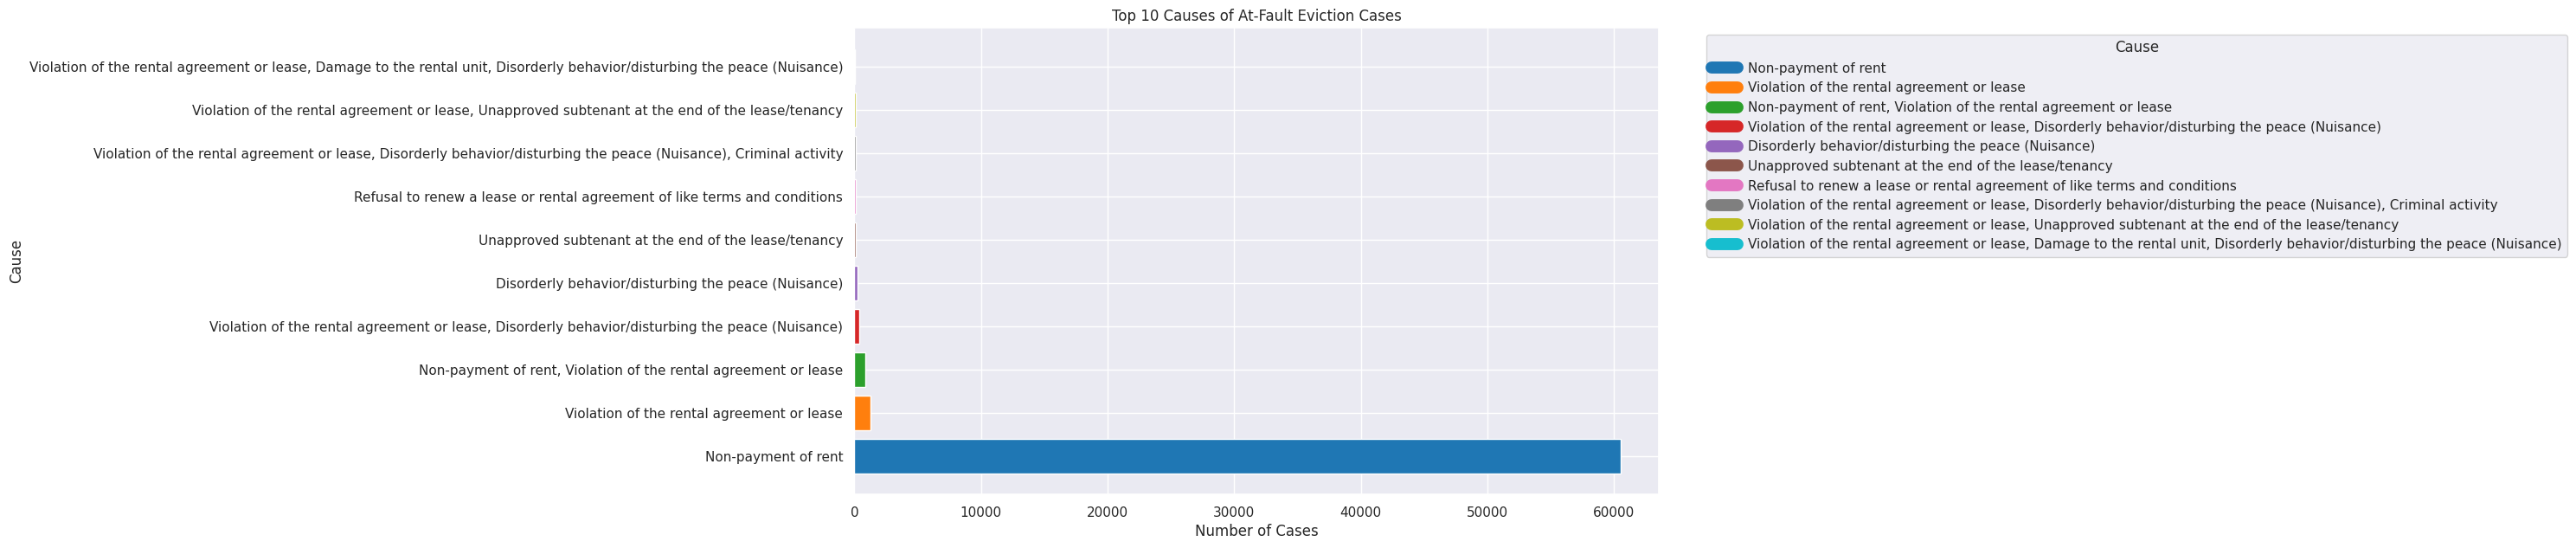

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter to include only 'At-Fault' evictions
at_fault_df = temp_df2[temp_df2['Eviction Category'] == 'At-Fault']

# Get the summary count for each 'Cause'
cause_summary = at_fault_df['Cause'].value_counts()

# Select the top 10 causes
top_10_causes = cause_summary.head(10)

# Create a color palette based on the number of causes (top 10)
palette = sns.color_palette("tab10", len(top_10_causes))

# Create the horizontal bar plot
plt.figure(figsize=(12, 7))
bars = plt.barh(top_10_causes.index, top_10_causes.values, color=palette)

# Add labels and title
plt.xlabel('Number of Cases')
plt.ylabel('Cause')
plt.title('Top 10 Causes of At-Fault Eviction Cases')

# Add a legend inside the plot area
handles = [plt.Line2D([0], [0], color=color, linewidth=10) for color in palette]
plt.legend(handles, top_10_causes.index, title="Cause", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to fit the legend
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
# Display the summary for top 10 causes of At-Fault Eviction Cases
print(top_10_causes)

Cause
Non-payment of rent                                                                                                           60547
Violation of the rental agreement or lease                                                                                     1298
Non-payment of rent, Violation of the rental agreement or lease                                                                 850
Violation of the rental agreement or lease, Disorderly behavior/disturbing the peace (Nuisance)                                 364
Disorderly behavior/disturbing the peace (Nuisance)                                                                             252
Unapproved subtenant at the end of the lease/tenancy                                                                             93
Refusal to renew a lease or rental agreement of like terms and conditions                                                        88
Violation of the rental agreement or lease, Disorderly behavior/distur

The above statistics and graph show that majority of the reason for tenants being sent eviction notices were due to non-payment of rent(60547) and/or violation of the rental agreement or lease.

<ipython-input-23-19d89762a226>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df2['Notice Date'] = pd.to_datetime(temp_df2['Notice Date'])
<ipython-input-23-19d89762a226>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df2['Month'] = temp_df2['Notice Date'].dt.month


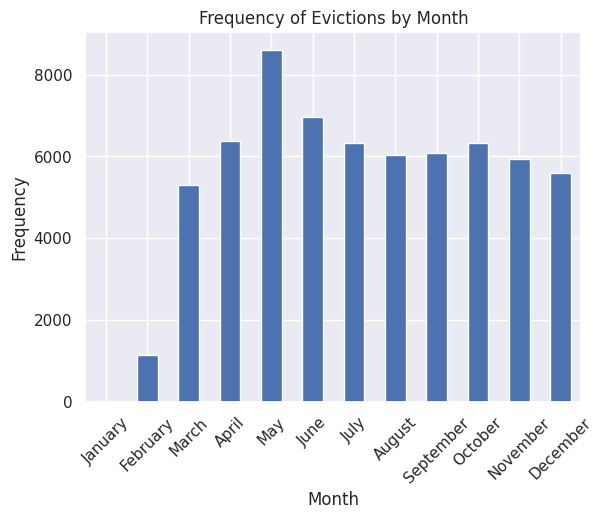

In [23]:
# Bar plot for frequency vs month by month chronologically

import matplotlib.pyplot as plt
import pandas as pd
import calendar

# Convert the 'Notice Date' column to datetime objects
temp_df2['Notice Date'] = pd.to_datetime(temp_df2['Notice Date'])

# Extract the month from the 'Notice Date' column
temp_df2['Month'] = temp_df2['Notice Date'].dt.month

# Group the data by month and count the occurrences
monthly_counts = temp_df2['Month'].value_counts().sort_index()

# Create a bar plot of the monthly counts
monthly_counts.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Evictions by Month')

# Ensure the months are displayed as integer values
# plt.xticks(ticks=range(len(monthly_counts)), labels=monthly_counts.index.astype(int))

# Convert index to integer to map to month names
monthly_counts.index = monthly_counts.index.astype(int)

# Map month numbers to month names
month_names = [calendar.month_name[i] for i in monthly_counts.index]

# Ensure the months are displayed as names
plt.xticks(ticks=range(len(monthly_counts)), labels=month_names, rotation=45)


plt.show()


From the above representation, we can infer that the maximum eviction cases were filed in the month of May approximately reaching 9000 cases.

Summary of 'Notice Type' Categories:
Notice Type
3 Day      59606
30 Day      3788
10 Day       871
60 Day       309
120 Day      103
90 Day        33
15 Day        26
Name: count, dtype: int64


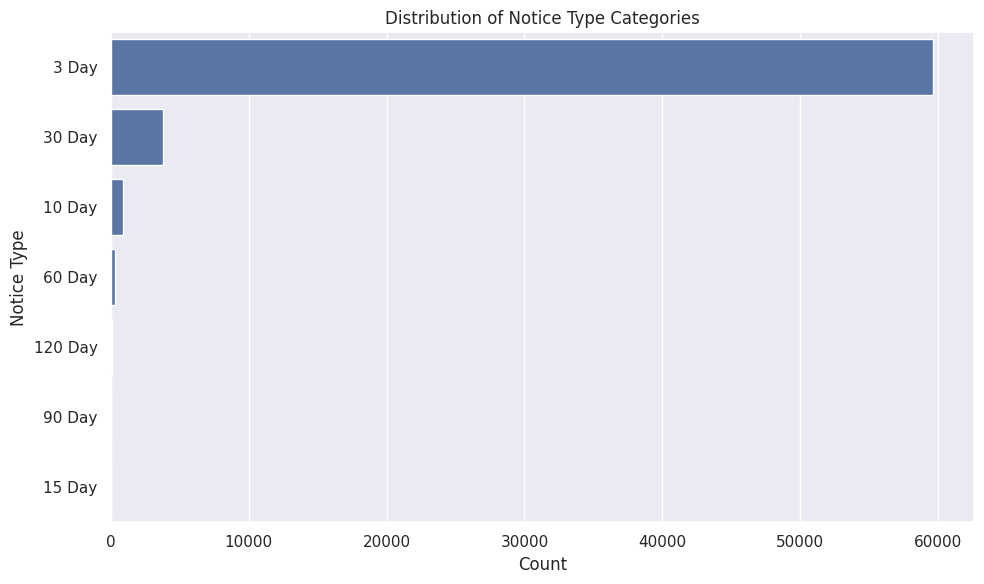

In [24]:
# Get the summary count for each 'Notice Type'
notice_type_summary = temp_df2['Notice Type'].value_counts()

# Display the summary
print("Summary of 'Notice Type' Categories:")
print(notice_type_summary)

plt.figure(figsize=(10, 6))
sns.countplot(y='Notice Type', data=temp_df2, order=notice_type_summary.index)
plt.title('Distribution of Notice Type Categories')
plt.xlabel('Count')
plt.ylabel('Notice Type')
plt.tight_layout()

# Show the plot
plt.show()

A majority of tenants, almost 60000 tenants had a 3-day Notice Type.

In [25]:
# Removing the Month column since its not needed anymore
data = temp_df2
data = data.drop(columns=['Month'])

In [26]:
def convert_to_bedroom(value):
    if value == 0:
        return 'Efficiency'
    elif value == 1:
        return 'One-Bedroom'
    elif value == 2:
        return 'Two-Bedroom'
    elif value == 3:
        return 'Three-Bedroom'
    # Add more conditions as needed
    elif value == 4:
      return 'Four-Bedroom'
    else:
        return 'Other'  # For values that don't match

In [27]:
data['Bedroom'] = data['Bedroom'].apply(convert_to_bedroom)

In [28]:
data["Bedroom"].value_counts()

,count
Bedroom,
One-Bedroom,27246
Two-Bedroom,21039
Efficiency,11268
Three-Bedroom,3949
Four-Bedroom,1234


### Merging the FMR Dataset

In [29]:
fmr = pd.read_csv("/content/FMR_by_Zip.csv")

In [30]:
fmr

,ZIP Code,Efficiency,One-Bedroom,Two-Bedroom,Three-Bedroom,Four-Bedroom,Two-Bedroom FMR Basis
0,90001,"$1,534","$1,747","$2,222","$2,888","$3,170",FMR
1,90002,"$1,534","$1,747","$2,222","$2,888","$3,170",FMR
2,90003,"$1,534","$1,747","$2,222","$2,888","$3,170",FMR
3,90004,"$1,560","$1,780","$2,260","$2,940","$3,220",SAFMR
4,90005,"$1,660","$1,890","$2,400","$3,120","$3,420",SAFMR
...,...,...,...,...,...,...,...
468,93584,"$1,534","$1,750","$2,222","$2,890","$3,170",FMR
469,93586,"$1,534","$1,750","$2,222","$2,890","$3,170",FMR
470,93590,"$1,534","$1,750","$2,222","$2,890","$3,170",FMR
471,93591,"$1,534","$1,747","$2,222","$2,888","$3,170",FMR


In [31]:
merged_df = pd.merge(data, fmr, left_on='Zip', right_on='ZIP Code')

In [32]:
merged_df.shape

(64719, 19)

In [33]:
y = merged_df.iloc[0]
y

,0
Notice Date,2023-02-09 00:00:00
Date Received,2/9/2023
Eviction Category,At-Fault
Cause,Non-payment of rent
Address,7245 Baek Court
City,Van Nuys
Zip,91405
Bedroom,Three-Bedroom
Notice Type,3 Day
Apn,2221019119


In [34]:
value=y[y['Bedroom']][1:]
value

'2,888'

In [35]:
numeric_value = int(value.replace('$', '').replace(',', ''))
numeric_value

2888

In [36]:
fmr_value=[]
for x,y in merged_df.iterrows():
  value=y[y['Bedroom']][1:]
  numeric_value = int(value.replace('$', '').replace(',', ''))
  fmr_value.append(numeric_value)

In [37]:
len(fmr_value)

64719

In [38]:
merged_df['fmr_value']=fmr_value

In [39]:
rent_owed=[]
for x,y in merged_df.iterrows():
  value=int(float(y['Rent Owed'].replace('$', '').replace(',', '')))
  rent_owed.append(value)

In [40]:
len(rent_owed)

64719

In [41]:
merged_df['rent_owed']=rent_owed

In [42]:
merged_df.to_csv("fmr_&_eviction_merged.csv",index=False)

In [43]:
merged_df

,Notice Date,Date Received,Eviction Category,Cause,Address,City,Zip,Bedroom,Notice Type,Apn,...,Rent Owed,ZIP Code,Efficiency,One-Bedroom,Two-Bedroom,Three-Bedroom,Four-Bedroom,Two-Bedroom FMR Basis,fmr_value,rent_owed
0,2023-02-09,2/9/2023,At-Fault,Non-payment of rent,7245 Baek Court,Van Nuys,91405,Three-Bedroom,3 Day,2221019119,...,"$10,455.00",91405,"$1,534","$1,747","$2,222","$2,888","$3,170",FMR,2888,10455
1,2023-02-24,2/24/2023,At-Fault,"Non-payment of rent, Violation of the rental a...",14333 Roscoe Blvd,Panorama City,91405,Two-Bedroom,3 Day,2638026036,...,"$2,310.00",91405,"$1,534","$1,747","$2,222","$2,888","$3,170",FMR,2222,2310
2,2023-02-24,2/24/2023,At-Fault,"Non-payment of rent, Violation of the rental a...",14333 W Roscoe Blvd,Panorama City,91405,Three-Bedroom,3 Day,2638026036,...,"$2,971.50",91405,"$1,534","$1,747","$2,222","$2,888","$3,170",FMR,2888,2971
3,2023-02-25,2/24/2023,At-Fault,"Non-payment of rent, Violation of the rental a...",14333 Roscoe Blvd,Panorama City,91405,Two-Bedroom,3 Day,2638026036,...,"$1,925.00",91405,"$1,534","$1,747","$2,222","$2,888","$3,170",FMR,2222,1925
4,2023-02-24,2/24/2023,At-Fault,"Non-payment of rent, Violation of the rental a...",14333 Roscoe Blvd,Panorama City,91405,One-Bedroom,3 Day,2638026036,...,"$1,995.00",91405,"$1,534","$1,747","$2,222","$2,888","$3,170",FMR,1747,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64714,2023-12-18,12/21/2023,At-Fault,Non-payment of rent,21915 W SATICOY ST,CANOGA PARK,93063,Two-Bedroom,3 Day,2110014024,...,"$1,164.00",93063,"$1,880","$2,200","$2,670","$3,710","$4,360",SAFMR,2670,1164
64715,2023-08-25,8/28/2023,At-Fault,Violation of the rental agreement or lease,11301 WILSHIRE BLVD,Los Angeles,90073,Efficiency,3 Day,4365008903,...,$0.00,90073,"$2,300","$2,620","$3,330","$4,330","$4,750",SAFMR,2300,0
64716,2023-08-29,8/31/2023,At-Fault,"Violation of the rental agreement or lease, Di...",11301 WILSHIRE BLVD,Los Angeles,90073,One-Bedroom,30 Day,4365008903,...,$0.00,90073,"$2,300","$2,620","$3,330","$4,330","$4,750",SAFMR,2620,0
64717,2023-10-04,10/6/2023,At-Fault,Non-payment of rent,9940 W COVELLO ST,Los Angeles,91504,Three-Bedroom,3 Day,2405019040,...,"$3,800.00",91504,"$1,900","$2,160","$2,750","$3,570","$3,920",SAFMR,3570,3800


In [44]:
at_fault=[]
for x,y in merged_df.iterrows():
  if y['fmr_value']<y['rent_owed']:
    at_fault.append('Yes')
  else:
    at_fault.append('No')

In [45]:
at_fault.count('No')

21544

It can be observed that 21544 eviction notices were filed wrongfully, i.e. even when the rent owed was less than the FMR value for that respective bedroom.  

In [46]:
merged_df['fault']=at_fault

In [47]:
merged_df[(merged_df['fault']=='No') & (merged_df['Eviction Category']=='At-Fault')]["Cause"].value_counts()

,count
Cause,
Non-payment of rent,18327
Violation of the rental agreement or lease,1243
"Violation of the rental agreement or lease, Disorderly behavior/disturbing the peace (Nuisance)",347
Disorderly behavior/disturbing the peace (Nuisance),249
"Non-payment of rent, Violation of the rental agreement or lease",178
...,...
"Non-payment of rent, Violation of the rental agreement or lease, Damage to the rental unit, Refuse access to the apartment when requested in accordance with law",1
"Damage to the rental unit, Refuse access to the apartment when requested in accordance with law",1
"Non-payment of rent, Violation of the rental agreement or lease, Damage to the rental unit, Refusal to renew a lease or rental agreement of like terms and conditions",1


We observe that the main cause for eviction of tenants that were misclassified as 'At-Fault' in the original data set is 'Non-payment of Rent', which is absolutely wrong since their rent owed was less than the FMR for their specific bedroom apartment. There were 18327 cases of wrongful evictions for Non-payment of Rent alone. Therefore, we will further investigate metadata to find a connection for wrongful evictions.

In [48]:
falsely_accused = merged_df[(merged_df['fault']=='No') & (merged_df['Eviction Category']=='At-Fault') & (merged_df["Cause"]=="Non-payment of rent")]

In [49]:
falsely_accused.shape

(18327, 22)

In [50]:
falsely_accused.to_csv("falsely_accused.csv",index=False)

In [51]:
falsely_accused['Zip'].value_counts()

,count
Zip,
90036,1889
91367,1437
90028,939
90014,848
90015,816
...,...
90248,2
90077,2
90230,2


In [52]:
median_salary = pd.read_csv("/content/LA_2022_median_salary.csv")

In [53]:
merged_df2 = pd.merge(falsely_accused, median_salary, left_on='Zip', right_on='Zip Code')

In [54]:
zip_counts = merged_df2["Zip Code"].value_counts()

# Convert the Series to a DataFrame
zip_counts_df = zip_counts.reset_index()

# Rename the columns for clarity
zip_counts_df.columns = ['Zip Code', 'Count']

In [55]:
zip_counts_df

,Zip Code,Count
0,90036,1889
1,91367,1437
2,90028,939
3,90014,848
4,90015,816
...,...,...
103,90248,2
104,90077,2
105,90230,2
106,90058,2


In [56]:
median_salary

,Zip Code,Community,2022 Estimated Median Income
0,90001,"Los Angeles(South Los Angeles), Florence-Graham","$57,698"
1,90002,"Los Angeles(Southeast Los Angeles, Watts)","$54,221"
2,90003,"Los Angeles(South Los Angeles, Southeast Los A...","$51,275"
3,90004,"Los Angeles(Hancock Park, Rampart Village, Vir...","$58,420"
4,90005,"Los Angeles(Hancock Park, Koreatown, Wilshire ...","$49,226"
...,...,...,...
278,93551,"City Ranch,Leona Valley,Palmdale","$107,133"
279,93552,Palmdale,"$85,890"
280,93553,"Juniper Hills, Pearblossom","$71,587"
281,93563,"Pearblossom, Valyermo","No 2022 estimate ($210,600 in 2021)†"


In [57]:
merged_df_3 = pd.merge(zip_counts_df, median_salary, left_on='Zip Code', right_on='Zip Code')

In [59]:
merged_df_3

,Zip Code,Count,Community,2022 Estimated Median Income
0,90036,1889,"Los Angeles(Fairfax, Melrose, Miracle Mile, Pa...","$97,583"
1,91367,1437,Los Angeles(Woodland Hills),"$106,355"
2,90028,939,Los Angeles(Hollywood),"$57,258"
3,90014,848,"Los Angeles(Downtown Historic Core, Arts Distr...","$26,550"
4,90015,816,"Los Angeles(Dowtown Fashion District, South Pa...","$61,959"
...,...,...,...,...
103,90248,2,Gardena,"$75,865"
104,90077,2,"Los Angeles(Bel Air Estates, Beverly Glen)","$203,194"
105,90230,2,Culver City,"$107,870"
106,90058,2,"Los Angeles(Southeast Los Angeles), Vernon","$34,093"


In [58]:
merged_df_3['2022 Estimated Median Income'][0][1:]

'97,583'

In [61]:
value = merged_df_3['2022 Estimated Median Income'][0][1:]
numeric_value = int(value.replace(',', ''))
numeric_value

97583

In [63]:
salary=[]
for x,y in merged_df_3.iterrows():
  value = y['2022 Estimated Median Income'][1:]
  int_value = int(value.replace(',', ''))
  salary.append(int_value)

In [64]:
merged_df_3['salary']=salary

In [65]:
merged_df_3

,Zip Code,Count,Community,2022 Estimated Median Income,salary
0,90036,1889,"Los Angeles(Fairfax, Melrose, Miracle Mile, Pa...","$97,583",97583
1,91367,1437,Los Angeles(Woodland Hills),"$106,355",106355
2,90028,939,Los Angeles(Hollywood),"$57,258",57258
3,90014,848,"Los Angeles(Downtown Historic Core, Arts Distr...","$26,550",26550
4,90015,816,"Los Angeles(Dowtown Fashion District, South Pa...","$61,959",61959
...,...,...,...,...,...
103,90248,2,Gardena,"$75,865",75865
104,90077,2,"Los Angeles(Bel Air Estates, Beverly Glen)","$203,194",203194
105,90230,2,Culver City,"$107,870",107870
106,90058,2,"Los Angeles(Southeast Los Angeles), Vernon","$34,093",34093


### Graphical visualizations for 'Wrongfully Evicted People'

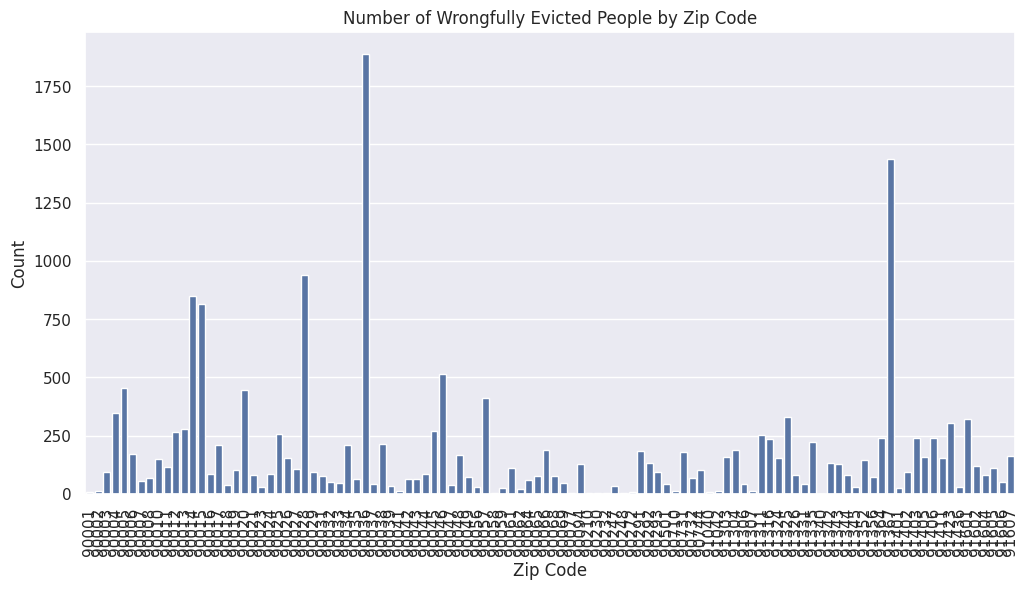

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Zip Code', y='Count', data=merged_df_3)
plt.xticks(rotation=90)
plt.title('Number of Wrongfully Evicted People by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.show()

The highest wrongfully evicted cases were recorded in the zip code - 90036, followed by the zip code 91367.

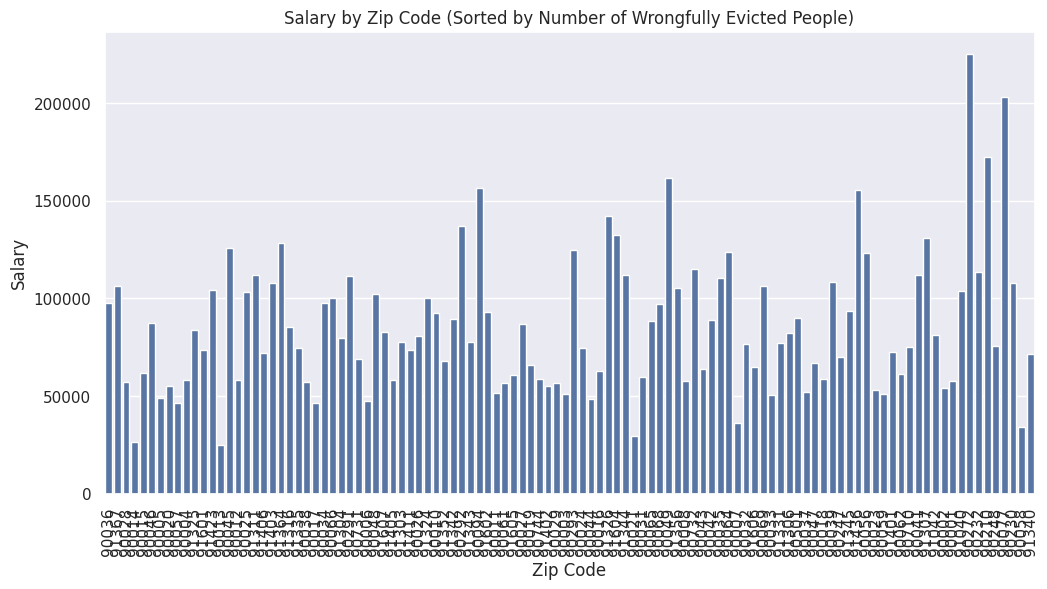

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by 'Count' in descending order
df_sorted = merged_df_3.sort_values(by='Count', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Zip Code', y='salary', data=df_sorted, order=df_sorted['Zip Code'])
plt.title('Salary by Zip Code (Sorted by Number of Wrongfully Evicted People)')
plt.xlabel('Zip Code')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [69]:
df = merged_df_3

In [70]:
!pip install geopy folium

In [71]:
from geopy.geocoders import Nominatim
import folium

geolocator = Nominatim(user_agent="zip_code_locator")

def get_lat_long(zip_code):
    try:
        location = geolocator.geocode(zip_code)
        return (location.latitude, location.longitude)
    except:
        return (None, None)

# Apply the geocoding function to each ZIP code
df['Coordinates'] = df['Zip Code'].apply(get_lat_long)
df[['Latitude', 'Longitude']] = pd.DataFrame(df['Coordinates'].tolist(), index=df.index)

# Create a Folium map centered around Los Angeles
m = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Add markers to the map for each ZIP code
for _, row in df.iterrows():
    if row['Latitude'] and row['Longitude']:  # Check if the coordinates are valid
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"ZIP Code: {row['Zip Code']}<br>salary: ${row['salary']:,}<br>Count: {row['Count']}",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(m)

In [72]:
df

,Zip Code,Count,Community,2022 Estimated Median Income,salary,Coordinates,Latitude,Longitude
0,90036,1889,"Los Angeles(Fairfax, Melrose, Miracle Mile, Pa...","$97,583",97583,"(38.032346375, 13.45267341875)",38.032346,13.452673
1,91367,1437,Los Angeles(Woodland Hills),"$106,355",106355,"(49.626673049999994, 11.264831535613922)",49.626673,11.264832
2,90028,939,Los Angeles(Hollywood),"$57,258",57258,"(34.10068415948276, -118.32950242988505)",34.100684,-118.329502
3,90014,848,"Los Angeles(Downtown Historic Core, Arts Distr...","$26,550",26550,"(38.044439175, 13.52935805)",38.044439,13.529358
4,90015,816,"Los Angeles(Dowtown Fashion District, South Pa...","$61,959",61959,"(38.03304276885246, 14.024744513114753)",38.033043,14.024745
...,...,...,...,...,...,...,...,...
103,90248,2,Gardena,"$75,865",75865,"(48.1360227, 22.632739766666667)",48.136023,22.632740
104,90077,2,"Los Angeles(Bel Air Estates, Beverly Glen)","$203,194",203194,"(34.11533435636364, -118.44273997818182)",34.115334,-118.442740
105,90230,2,Culver City,"$107,870",107870,"(58.73245799315069, 23.69288248219178)",58.732458,23.692882
106,90058,2,"Los Angeles(Southeast Los Angeles), Vernon","$34,093",34093,"(34.00307681784232, -118.22808484605808)",34.003077,-118.228085


In [73]:
us_zip = pd.read_csv("/content/us_zip")

In [74]:
us_zip

,ZIP,LAT,LNG
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135
...,...,...,...
33139,99923,56.002315,-130.041026
33140,99925,55.550204,-132.945933
33141,99926,55.138352,-131.470424
33142,99927,56.239062,-133.457924


In [75]:
merged_df_3

,Zip Code,Count,Community,2022 Estimated Median Income,salary,Coordinates,Latitude,Longitude
0,90036,1889,"Los Angeles(Fairfax, Melrose, Miracle Mile, Pa...","$97,583",97583,"(38.032346375, 13.45267341875)",38.032346,13.452673
1,91367,1437,Los Angeles(Woodland Hills),"$106,355",106355,"(49.626673049999994, 11.264831535613922)",49.626673,11.264832
2,90028,939,Los Angeles(Hollywood),"$57,258",57258,"(34.10068415948276, -118.32950242988505)",34.100684,-118.329502
3,90014,848,"Los Angeles(Downtown Historic Core, Arts Distr...","$26,550",26550,"(38.044439175, 13.52935805)",38.044439,13.529358
4,90015,816,"Los Angeles(Dowtown Fashion District, South Pa...","$61,959",61959,"(38.03304276885246, 14.024744513114753)",38.033043,14.024745
...,...,...,...,...,...,...,...,...
103,90248,2,Gardena,"$75,865",75865,"(48.1360227, 22.632739766666667)",48.136023,22.632740
104,90077,2,"Los Angeles(Bel Air Estates, Beverly Glen)","$203,194",203194,"(34.11533435636364, -118.44273997818182)",34.115334,-118.442740
105,90230,2,Culver City,"$107,870",107870,"(58.73245799315069, 23.69288248219178)",58.732458,23.692882
106,90058,2,"Los Angeles(Southeast Los Angeles), Vernon","$34,093",34093,"(34.00307681784232, -118.22808484605808)",34.003077,-118.228085


In [76]:
merged_df_4 = pd.merge(merged_df_3, us_zip, left_on='Zip Code', right_on='ZIP')

In [77]:
merged_df_4

,Zip Code,Count,Community,2022 Estimated Median Income,salary,Coordinates,Latitude,Longitude,ZIP,LAT,LNG
0,90036,1889,"Los Angeles(Fairfax, Melrose, Miracle Mile, Pa...","$97,583",97583,"(38.032346375, 13.45267341875)",38.032346,13.452673,90036,34.070410,-118.350411
1,91367,1437,Los Angeles(Woodland Hills),"$106,355",106355,"(49.626673049999994, 11.264831535613922)",49.626673,11.264832,91367,34.177311,-118.615704
2,90028,939,Los Angeles(Hollywood),"$57,258",57258,"(34.10068415948276, -118.32950242988505)",34.100684,-118.329502,90028,34.099912,-118.326912
3,90014,848,"Los Angeles(Downtown Historic Core, Arts Distr...","$26,550",26550,"(38.044439175, 13.52935805)",38.044439,13.529358,90014,34.043146,-118.251746
4,90015,816,"Los Angeles(Dowtown Fashion District, South Pa...","$61,959",61959,"(38.03304276885246, 14.024744513114753)",38.033043,14.024745,90015,34.039378,-118.266300
...,...,...,...,...,...,...,...,...,...,...,...
103,90248,2,Gardena,"$75,865",75865,"(48.1360227, 22.632739766666667)",48.136023,22.632740,90248,33.878432,-118.284104
104,90077,2,"Los Angeles(Bel Air Estates, Beverly Glen)","$203,194",203194,"(34.11533435636364, -118.44273997818182)",34.115334,-118.442740,90077,34.108023,-118.456964
105,90230,2,Culver City,"$107,870",107870,"(58.73245799315069, 23.69288248219178)",58.732458,23.692882,90230,33.997862,-118.393617
106,90058,2,"Los Angeles(Southeast Los Angeles), Vernon","$34,093",34093,"(34.00307681784232, -118.22808484605808)",34.003077,-118.228085,90058,34.002844,-118.216400


In [78]:
m = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Add markers to the map for each ZIP code
for _, row in merged_df_4.iterrows():
    if row['LAT'] and row['LNG']:  # Check if the coordinates are valid
        folium.Marker(
            location=[row['LAT'], row['LNG']],
            popup=f"ZIP Code: {row['Zip Code']}<br>salary: ${row['salary']:,}<br>Count: {row['Count']}",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(m)

In [79]:
m

In [80]:
merged_df_4

,Zip Code,Count,Community,2022 Estimated Median Income,salary,Coordinates,Latitude,Longitude,ZIP,LAT,LNG
0,90036,1889,"Los Angeles(Fairfax, Melrose, Miracle Mile, Pa...","$97,583",97583,"(38.032346375, 13.45267341875)",38.032346,13.452673,90036,34.070410,-118.350411
1,91367,1437,Los Angeles(Woodland Hills),"$106,355",106355,"(49.626673049999994, 11.264831535613922)",49.626673,11.264832,91367,34.177311,-118.615704
2,90028,939,Los Angeles(Hollywood),"$57,258",57258,"(34.10068415948276, -118.32950242988505)",34.100684,-118.329502,90028,34.099912,-118.326912
3,90014,848,"Los Angeles(Downtown Historic Core, Arts Distr...","$26,550",26550,"(38.044439175, 13.52935805)",38.044439,13.529358,90014,34.043146,-118.251746
4,90015,816,"Los Angeles(Dowtown Fashion District, South Pa...","$61,959",61959,"(38.03304276885246, 14.024744513114753)",38.033043,14.024745,90015,34.039378,-118.266300
...,...,...,...,...,...,...,...,...,...,...,...
103,90248,2,Gardena,"$75,865",75865,"(48.1360227, 22.632739766666667)",48.136023,22.632740,90248,33.878432,-118.284104
104,90077,2,"Los Angeles(Bel Air Estates, Beverly Glen)","$203,194",203194,"(34.11533435636364, -118.44273997818182)",34.115334,-118.442740,90077,34.108023,-118.456964
105,90230,2,Culver City,"$107,870",107870,"(58.73245799315069, 23.69288248219178)",58.732458,23.692882,90230,33.997862,-118.393617
106,90058,2,"Los Angeles(Southeast Los Angeles), Vernon","$34,093",34093,"(34.00307681784232, -118.22808484605808)",34.003077,-118.228085,90058,34.002844,-118.216400


'Coordinates','Latitude', 'Longitude' are the values extracted using the geopy.geocoders API, but these mappings were wrong. To recitify this we used the official mapping of US Zip codes and lattitude and longitude dataset. Source: https://gist.github.com/erichurst/7882666

In [81]:
df = merged_df_4.drop(columns=['Coordinates','Latitude', 'Longitude'])

In [82]:
df.to_csv("zip_code_salary.csv",index=False)

In [83]:
merged_df_4 = pd.read_csv("/content/zip_code_salary.csv")

In [84]:
merged_df_4["Count"].median()

92.0

In [85]:
quartiles = merged_df_4["Count"].quantile([0.25, 0.5, 0.75])

In [86]:
def get_marker_color(count):
    if count > quartiles[0.75]:  # You can adjust the threshold values as needed
        return 'red'
    elif count > quartiles[0.5] and count < quartiles[0.75]:
        return 'orange'
    else:
        return 'green'
m = folium.Map(location=[34.0522, -118.2437], zoom_start=10)
# Add markers to the map for each ZIP code
for _, row in merged_df_4.iterrows():
    if row['LAT'] and row['LNG']:  # Check if the coordinates are valid
        marker_color = get_marker_color(row['Count'])  # Get the color based on count
        folium.Marker(
            location=[row['LAT'], row['LNG']],
            popup=f"ZIP Code: {row['Zip Code']}<br>Salary: ${row['salary']:,}<br>Count: {row['Count']}",
            icon=folium.Icon(color=marker_color, icon='info-sign')
        ).add_to(m)

In [87]:
m

 Median salary amount and wrongful evictions by zip code, followed no overarching trends. However, upon a closer inspection over the mp, we observe a few clusters for the highest wrongful eviction zip codes. We categorized the wrongful evictions into 3 categories -


*   75th percentile above - Red marker
*   Between 50th to 75th percentile - Orange marker
*   Below 50th percentile - Green marker

We observe a few clusters around the areas of West Hollywood, downtown Los Angeles, more specificly Korea town and China town, where the wrongful evictions were beyond the 75th percentile.
For 50th - 75th percentile cases, the zipcodes are sparingly spread and no specific trend is observed.
And lastly, we observe the cases of wrongful evictions were less severe around the southern regions of Los Angeles.





### Checking for Racial Biases in Wrongful Evictions



In [88]:
counts = pd.read_csv("/content/zip_code_salary.csv")

In [89]:
counts

,Zip Code,Count,Community,2022 Estimated Median Income,salary,ZIP,LAT,LNG
0,90036,1889,"Los Angeles(Fairfax, Melrose, Miracle Mile, Pa...","$97,583",97583,90036,34.070410,-118.350411
1,91367,1437,Los Angeles(Woodland Hills),"$106,355",106355,91367,34.177311,-118.615704
2,90028,939,Los Angeles(Hollywood),"$57,258",57258,90028,34.099912,-118.326912
3,90014,848,"Los Angeles(Downtown Historic Core, Arts Distr...","$26,550",26550,90014,34.043146,-118.251746
4,90015,816,"Los Angeles(Dowtown Fashion District, South Pa...","$61,959",61959,90015,34.039378,-118.266300
...,...,...,...,...,...,...,...,...
103,90248,2,Gardena,"$75,865",75865,90248,33.878432,-118.284104
104,90077,2,"Los Angeles(Bel Air Estates, Beverly Glen)","$203,194",203194,90077,34.108023,-118.456964
105,90230,2,Culver City,"$107,870",107870,90230,33.997862,-118.393617
106,90058,2,"Los Angeles(Southeast Los Angeles), Vernon","$34,093",34093,90058,34.002844,-118.216400


In [90]:
race_dist = pd.read_csv("/content/LA_race_population.csv")

In [91]:
race_dist

,Zip Code,Total Population,American Indian & Alaska Native,Asian,Black or African American,Native Hawaiian & Other Pacific Islander,White (Not Hispanic or Latino),Some Other Race,Two or More Races,Hispanic or Latino
0,City of L.A.,"3,881,041",1.05,11.82,8.56,0.15,27.55,24.54,12.72,47.11
1,90001,"57,652",2.13,0.60,7.45,0.02,0.65,40.67,20.88,91.31
2,90002,"53,108",3.72,1.15,15.73,0.10,0.38,39.43,16.70,82.41
3,90003,"75,024",0.80,0.47,16.46,0.00,0.47,47.58,17.51,81.55
4,90004,"58,833",1.26,24.79,4.45,0.12,20.58,31.12,9.34,46.59
...,...,...,...,...,...,...,...,...,...,...
111,91602,"19,980",0.42,9.60,7.17,0.45,59.40,7.15,11.94,18.56
112,91604,"32,073",0.29,8.62,4.26,0.00,69.01,2.94,11.05,11.90
113,91605,"51,654",1.46,8.47,2.03,0.04,27.24,27.84,16.24,60.52
114,91606,"43,552",1.29,3.95,5.01,0.00,33.76,23.71,14.95,53.65


In [92]:
race_dist['Zip Code'] = race_dist['Zip Code'].replace("City of L.A.", "0")
race_dist['Zip Code'] = race_dist['Zip Code'].astype('int64')

In [93]:
merged_df = pd.merge(counts, race_dist, left_on='Zip Code', right_on='Zip Code')

In [94]:
merged_df

,Zip Code,Count,Community,2022 Estimated Median Income,salary,ZIP,LAT,LNG,Total Population,American Indian & Alaska Native,Asian,Black or African American,Native Hawaiian & Other Pacific Islander,White (Not Hispanic or Latino),Some Other Race,Two or More Races,Hispanic or Latino
0,90036,1889,"Los Angeles(Fairfax, Melrose, Miracle Mile, Pa...","$97,583",97583,90036,34.070410,-118.350411,"37,713",0.37,19.15,6.33,0.06,55.42,3.92,9.95,13.65
1,91367,1437,Los Angeles(Woodland Hills),"$106,355",106355,91367,34.177311,-118.615704,"44,862",0.46,12.84,7.25,0.10,59.40,4.90,8.87,15.45
2,90028,939,Los Angeles(Hollywood),"$57,258",57258,90028,34.099912,-118.326912,"30,982",1.23,13.30,8.95,0.00,42.27,16.82,10.12,28.72
3,90014,848,"Los Angeles(Downtown Historic Core, Arts Distr...","$26,550",26550,90014,34.043146,-118.251746,"9,273",0.27,23.83,20.76,0.27,27.29,13.64,7.68,25.58
4,90015,816,"Los Angeles(Dowtown Fashion District, South Pa...","$61,959",61959,90015,34.039378,-118.266300,"25,554",2.49,20.34,9.06,0.00,14.17,24.41,11.09,52.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,90248,2,Gardena,"$75,865",75865,90248,33.878432,-118.284104,"11,453",0.64,33.41,18.77,0.27,6.29,19.59,10.77,33.74
102,90077,2,"Los Angeles(Bel Air Estates, Beverly Glen)","$203,194",203194,90077,34.108023,-118.456964,"7,868",0.00,6.85,2.29,0.00,78.24,2.07,9.20,5.94
103,90230,2,Culver City,"$107,870",107870,90230,33.997862,-118.393617,"32,005",0.22,14.13,8.85,0.27,39.56,7.38,16.72,30.15
104,90058,2,"Los Angeles(Southeast Los Angeles), Vernon","$34,093",34093,90058,34.002844,-118.216400,"3,049",0.00,0.49,16.53,0.03,10.76,33.39,5.84,69.20


In [95]:
df = merged_df

In [96]:
df['Total Population'] = df['Total Population'].str.replace(',', '').astype(int)

In [97]:

columns_to_analyze = [
    "Count", "Total Population", "American Indian & Alaska Native", "Asian",
    "Black or African American", "Native Hawaiian & Other Pacific Islander",
    "White (Not Hispanic or Latino)", "Some Other Race", "Two or More Races",
    "Hispanic or Latino"
]

# Ensure all selected columns are numeric
df[columns_to_analyze] = df[columns_to_analyze].apply(pd.to_numeric)

# Calculate the correlation matrix
correlation_matrix = df[columns_to_analyze].corr()


In [98]:
correlation_matrix

,Count,Total Population,American Indian & Alaska Native,Asian,Black or African American,Native Hawaiian & Other Pacific Islander,White (Not Hispanic or Latino),Some Other Race,Two or More Races,Hispanic or Latino
Count,1.000000,-0.014749,-0.042910,0.213610,-0.056417,-0.046142,0.120923,-0.156699,-0.187254,-0.187988
Total Population,-0.014749,1.000000,0.236116,-0.191559,-0.056143,-0.074011,-0.434921,0.518180,0.399019,0.567363
American Indian & Alaska Native,-0.042910,0.236116,1.000000,-0.071678,0.136654,0.062137,-0.597757,0.561940,0.346052,0.580219
Asian,0.213610,-0.191559,-0.071678,1.000000,-0.221929,0.316545,-0.025500,-0.171722,-0.391575,-0.289779
Black or African American,-0.056417,-0.056143,0.136654,-0.221929,1.000000,0.084180,-0.394348,-0.009837,-0.033567,-0.011242
Native Hawaiian & Other Pacific Islander,-0.046142,-0.074011,0.062137,0.316545,0.084180,1.000000,-0.183483,0.000471,-0.090186,0.008227
White (Not Hispanic or Latino),0.120923,-0.434921,-0.597757,-0.025500,-0.394348,-0.183483,1.000000,-0.804907,-0.323713,-0.829302
Some Other Race,-0.156699,0.518180,0.561940,-0.171722,-0.009837,0.000471,-0.804907,1.000000,0.273501,0.924509
Two or More Races,-0.187254,0.399019,0.346052,-0.391575,-0.033567,-0.090186,-0.323713,0.273501,1.000000,0.513096
Hispanic or Latino,-0.187988,0.567363,0.580219,-0.289779,-0.011242,0.008227,-0.829302,0.924509,0.513096,1.000000


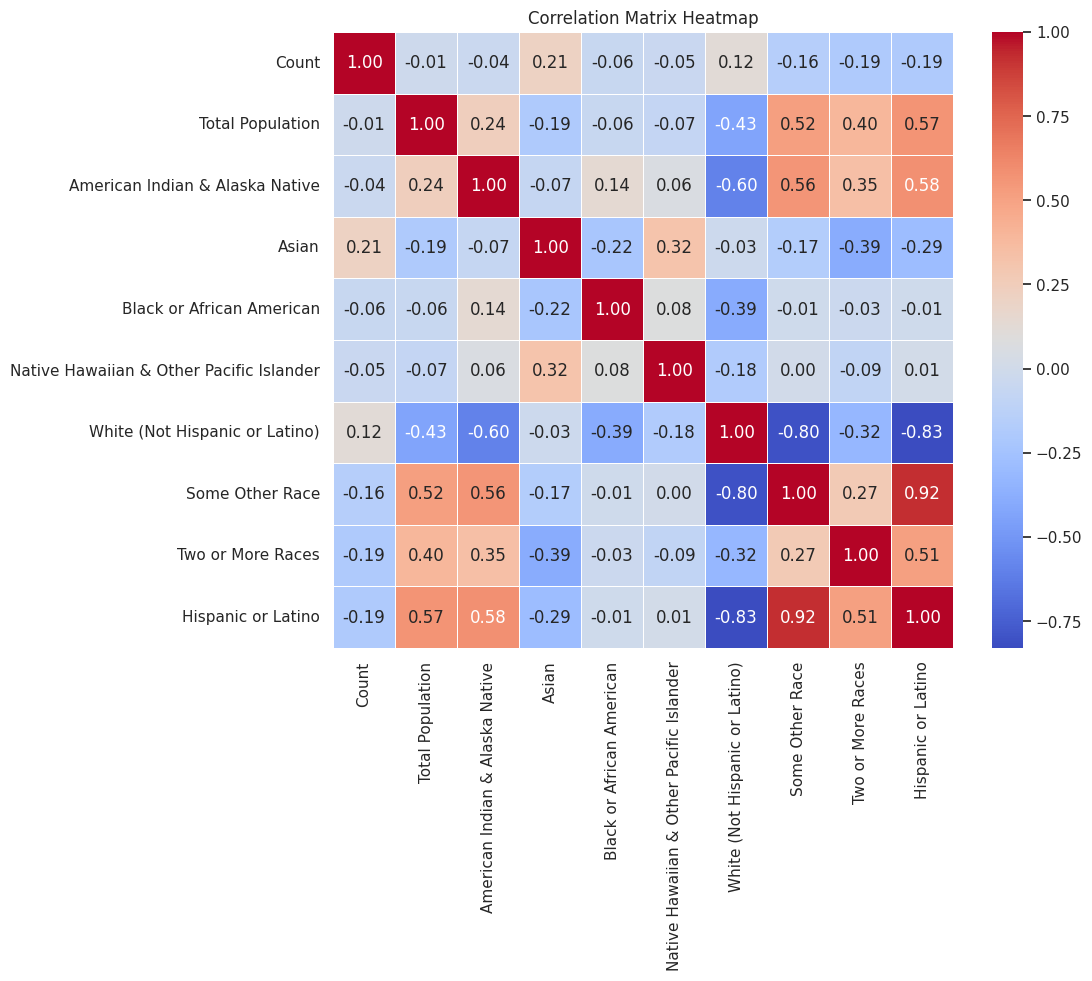

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the data is already loaded and prepared as in the previous step
# Continue from the previous example

# Calculate the correlation matrix
correlation_matrix = df[columns_to_analyze].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In order to further study the wrongful eviction cases, we segmented population based on the races. The above heatmap gives the correlation between the count of the wrongful eviction cases and the respective racial population. We observe that the highest correlation of 'count' was with Asians (0.21) followed by the Whites(0.12) These positive values tell us that the most affected races for these wrongful evictions were Asians.
The heatmap also shows the relation between 'Total Population' and the various races. The correlation value of 0.57 for Hispanics or Latinos with the 'Total Population' shows that people from the Hispanic communities prefer crowded areas for their housing whereas on the contrary, the highest negatively correlated value of -0.43 for White depicts that the Whites prefer areas with less crowding for housing. Along with that, the map can also tell us the preferences of races among themselves, when choosing a housing neighborhood.

### Conclusion



*   The data set had around 21k wrongful evictions(rent owed < FMR value) as compared to the total 65k values.
*   The major cause for these wrongful evictions were listed to be 'Non-payment of rent', which shouldn't be valid if the rent owed value is less than the FMR value.
*   The trends show no overarching between the household income vs the wrongful evictions per zip code. However, the map representation showed a few clusters and trends around the zip codes where the 75th percentile cases were of wrongful evictions (West Hollywood, Eastern Beverly Hills, Downtown LA, China Town in the north). The least affected areas with wrongful evictions were Southern areas, Angelwood, Pasadena etc.
*   For further closer inpection, we segmented population based on the races. We observed that the highest correlation of wrongful evictions was with Asians (0.21) followed by the Whites(0.12), therefore implying that the most affected races for wrongful evictions were Asians. It can also be seen that Hispanics or Latinos preferred neighborhoods with high population whereas the Whites preferred less crowded areas for housing.






